<a href="https://colab.research.google.com/github/JoseGarza1996/NaiveBayes/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from scipy import stats

import sklearn
from sklearn.neighbors import LocalOutlierFactor
from sklearn import naive_bayes
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV


pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
url1 = 'https://raw.githubusercontent.com/Fauxfox01/data/main/test.csv'
url2 = 'https://raw.githubusercontent.com/Fauxfox01/data/main/train.csv'
Test_data = pd.read_csv(url1)
Train_data = pd.read_csv(url2)

## Data Exploration

I am looking for any null variables, I see none so I know I have no missing. I then check the data for other abnormalities. 

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       284 non-null    int64  
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

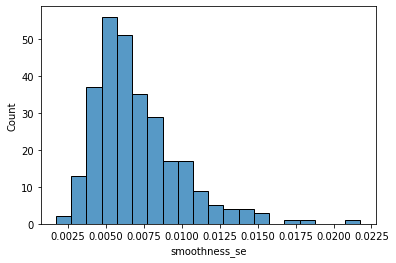

In [ ]:

sns.histplot(Test_data, x='smoothness_se')

In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       285 non-null    int64  
 1   radius_mean              285 non-null    float64
 2   texture_mean             285 non-null    float64
 3   perimeter_mean           285 non-null    float64
 4   area_mean                285 non-null    float64
 5   smoothness_mean          285 non-null    float64
 6   compactness_mean         285 non-null    float64
 7   concavity_mean           285 non-null    float64
 8   concave points_mean      285 non-null    float64
 9   symmetry_mean            285 non-null    float64
 10  fractal_dimension_mean   285 non-null    float64
 11  radius_se                285 non-null    float64
 12  texture_se               285 non-null    float64
 13  perimeter_se             285 non-null    float64
 14  area_se                  2

In [ ]:

X_train = Train_data.iloc[:, 1:]
X_columns = X_train.columns


X_test = Test_data.iloc[:, 1:]

idC = Test_data.iloc[:, :1]

Checking to see if the data has outliers.

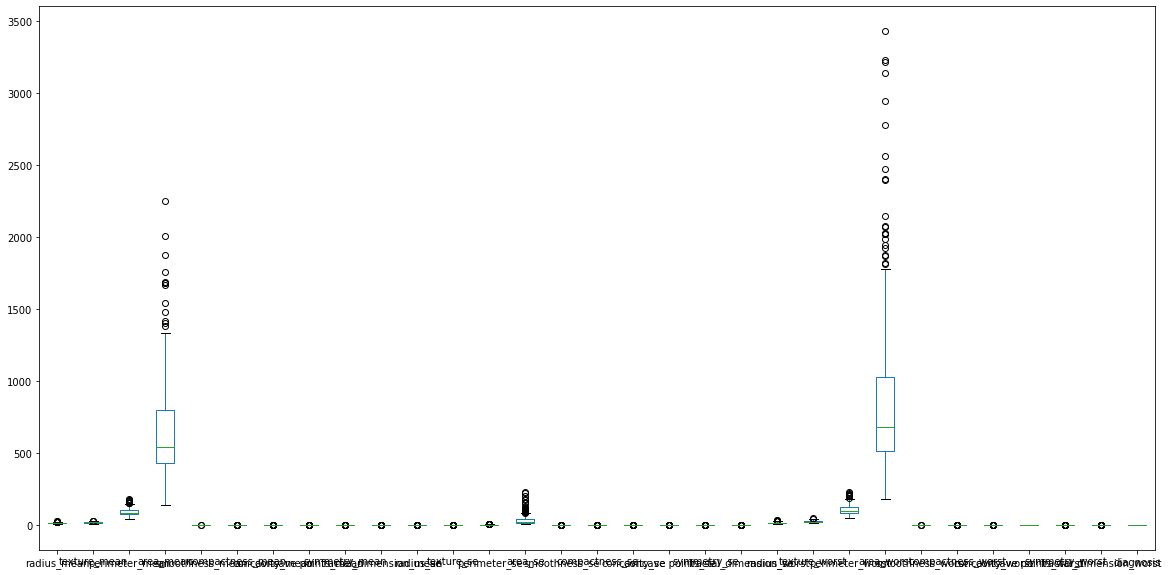

In [ ]:
fig = plt.figure(figsize = (20,10))
X_train.boxplot(column=[name for name in list(X_train)], grid=False)

## Outlier Handling

 Looking at the data, I decided to not handle any outliers. The data between the test and train set are very similar so I dont expect a penalty from this. 

In [ ]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,14.133384,19.354824,91.96331,656.370423,0.095307,0.102288,0.088245,0.047708,0.180214,0.062251,0.395850,1.221463,2.799136,38.974380,0.007036,0.025967,0.033004,0.011738,0.020623,0.003875,16.248229,25.865739,107.215493,880.827817,0.130850,0.252964,0.276384,0.113469,0.288513,0.083050,0.373239
std,3.557272,4.308783,24.44977,353.886842,0.014372,0.050656,0.079657,0.038772,0.026448,0.007089,0.237095,0.534399,1.676412,36.551638,0.003142,0.018662,0.035852,0.006575,0.008063,0.003137,4.883497,6.152410,34.022758,580.281025,0.022626,0.159129,0.217757,0.066945,0.058428,0.018022,0.484519
min,6.981000,9.710000,43.79000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.114400,0.406400,0.771400,6.802000,0.002838,0.002252,0.000000,0.000000,0.010290,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.807500,16.060000,76.09750,428.675000,0.084668,0.062740,0.029640,0.019603,0.161775,0.057068,0.236450,0.856775,1.667000,17.967500,0.005298,0.012828,0.015030,0.007482,0.015017,0.002225,12.977500,21.382500,83.722500,512.450000,0.114300,0.145325,0.118475,0.062563,0.250300,0.071145,0.000000
50%,13.205000,18.945000,85.25000,540.250000,0.094155,0.093435,0.061745,0.033025,0.178300,0.061115,0.327500,1.094000,2.330000,24.950000,0.006302,0.020625,0.026245,0.010850,0.019030,0.003044,14.995000,25.580000,97.665000,683.600000,0.129450,0.211600,0.229800,0.097355,0.280950,0.078650,0.000000
75%,16.132500,21.825000,106.45000,799.100000,0.104825,0.127975,0.127700,0.070468,0.194425,0.065410,0.476050,1.478500,3.274000,44.467500,0.007989,0.033247,0.040697,0.014672,0.024202,0.004328,18.247500,30.127500,124.475000,1031.250000,0.144550,0.321725,0.386550,0.162925,0.311575,0.091482,1.000000
max,27.220000,32.470000,182.10000,2250.000000,0.163400,0.286700,0.426800,0.201200,0.274300,0.095020,1.509000,3.896000,9.807000,233.000000,0.031130,0.106400,0.396000,0.052790,0.061460,0.029840,33.130000,47.160000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.286700,0.577400,0.207500,1.000000


In [ ]:
X_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,14.121221,19.224702,91.974737,653.412982,0.097410,0.106387,0.089352,0.050126,0.182106,0.063343,0.414461,1.212260,2.932748,41.694996,0.007046,0.024991,0.030787,0.011854,0.020461,0.003715,16.290077,25.489368,107.306772,880.339298,0.133882,0.255561,0.268008,0.115740,0.291633,0.084838
std,3.496876,4.299895,24.190794,350.553565,0.013695,0.054891,0.079919,0.038864,0.028359,0.007001,0.312434,0.569221,2.316547,52.951278,0.002862,0.017143,0.023218,0.005749,0.008478,0.002046,4.791138,6.145173,33.238311,559.280107,0.022976,0.155799,0.199403,0.064599,0.065180,0.018088
min,7.691000,10.720000,47.920000,170.400000,0.052630,0.023440,0.000000,0.000000,0.116700,0.050250,0.111500,0.360200,0.757000,7.228000,0.001713,0.003012,0.000000,0.000000,0.007882,0.001002,8.678000,12.490000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.630000,16.210000,74.680000,415.100000,0.087590,0.066780,0.028910,0.021000,0.162800,0.058630,0.231500,0.812100,1.577000,17.850000,0.005042,0.013300,0.015090,0.007978,0.015180,0.002272,13.030000,20.860000,84.420000,516.500000,0.119000,0.147700,0.109100,0.066640,0.250500,0.072070
50%,13.500000,18.610000,87.320000,561.000000,0.097730,0.092630,0.059990,0.033840,0.179800,0.062140,0.319100,1.139000,2.244000,23.920000,0.006432,0.020030,0.025090,0.011030,0.018570,0.003317,14.920000,25.230000,97.580000,686.500000,0.133800,0.216400,0.224900,0.101700,0.283300,0.081740
75%,15.730000,21.600000,103.600000,766.600000,0.106100,0.130500,0.131900,0.077260,0.197600,0.066720,0.482500,1.466000,3.466000,48.290000,0.008439,0.032030,0.042560,0.014800,0.022940,0.004590,19.180000,29.410000,126.300000,1124.000000,0.147800,0.346300,0.378600,0.159900,0.321800,0.092210
max,28.110000,39.280000,188.500000,2501.000000,0.142500,0.345400,0.426400,0.182300,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.021770,0.135400,0.153500,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,0.932700,0.960800,0.291000,0.663800,0.173000


## Further Data Exploration

I want to look at the relationship between my features to get an idea on how I should go about building my algorithm. I also need to look at each feature indepedently using describe()

In [ ]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,14.133384,19.354824,91.96331,656.370423,0.095307,0.102288,0.088245,0.047708,0.180214,0.062251,0.395850,1.221463,2.799136,38.974380,0.007036,0.025967,0.033004,0.011738,0.020623,0.003875,16.248229,25.865739,107.215493,880.827817,0.130850,0.252964,0.276384,0.113469,0.288513,0.083050,0.373239
std,3.557272,4.308783,24.44977,353.886842,0.014372,0.050656,0.079657,0.038772,0.026448,0.007089,0.237095,0.534399,1.676412,36.551638,0.003142,0.018662,0.035852,0.006575,0.008063,0.003137,4.883497,6.152410,34.022758,580.281025,0.022626,0.159129,0.217757,0.066945,0.058428,0.018022,0.484519
min,6.981000,9.710000,43.79000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.114400,0.406400,0.771400,6.802000,0.002838,0.002252,0.000000,0.000000,0.010290,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.807500,16.060000,76.09750,428.675000,0.084668,0.062740,0.029640,0.019603,0.161775,0.057068,0.236450,0.856775,1.667000,17.967500,0.005298,0.012828,0.015030,0.007482,0.015017,0.002225,12.977500,21.382500,83.722500,512.450000,0.114300,0.145325,0.118475,0.062563,0.250300,0.071145,0.000000
50%,13.205000,18.945000,85.25000,540.250000,0.094155,0.093435,0.061745,0.033025,0.178300,0.061115,0.327500,1.094000,2.330000,24.950000,0.006302,0.020625,0.026245,0.010850,0.019030,0.003044,14.995000,25.580000,97.665000,683.600000,0.129450,0.211600,0.229800,0.097355,0.280950,0.078650,0.000000
75%,16.132500,21.825000,106.45000,799.100000,0.104825,0.127975,0.127700,0.070468,0.194425,0.065410,0.476050,1.478500,3.274000,44.467500,0.007989,0.033247,0.040697,0.014672,0.024202,0.004328,18.247500,30.127500,124.475000,1031.250000,0.144550,0.321725,0.386550,0.162925,0.311575,0.091482,1.000000
max,27.220000,32.470000,182.10000,2250.000000,0.163400,0.286700,0.426800,0.201200,0.274300,0.095020,1.509000,3.896000,9.807000,233.000000,0.031130,0.106400,0.396000,0.052790,0.061460,0.029840,33.130000,47.160000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.286700,0.577400,0.207500,1.000000


In [ ]:
Y_train = Train_data.iloc[:, 31:32]
X_train = Train_data.iloc[:, 1:31]

# Standardization and Normalization

Since the features are only compared to eachother, normaization or standardization does not seem neccessary. I chose to do neither.

In [ ]:
#scaler = preprocessing.StandardScaler()


# Choice of Algorithm

I submitted my predictions using Gaussian Naive Bayes algorithm. A near Gaussian distribution is assumed which is where The Gaussian Naives Bayes performs very well at. 

In [ ]:
X_train,X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25)
clf = GaussianNB()

In [ ]:
clf.fit(X_train, Y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = clf.predict(X_val)
print("Test Set: \n")
print("Accuracy: ",accuracy_score(Y_val, y_pred),"\n")
print("Precision: ",sklearn.metrics.precision_score(Y_val, y_pred),"\n")
print("Recall: ",sklearn.metrics.recall_score(Y_val, y_pred),"\n")
print("ROC: ",sklearn.metrics.roc_auc_score(Y_val, y_pred),"\n")
print("F1: ",sklearn.metrics.f1_score(Y_val, y_pred),"\n")

Test Set: 

Accuracy:  0.9577464788732394 

Precision:  0.9642857142857143 

Recall:  0.9310344827586207 

ROC:  0.9536124794745484 

F1:  0.9473684210526316 



In [ ]:
y_pred = clf.predict(X_train)
print("Train Set Set: \n")
print("Accuracy: ",accuracy_score(Y_train, y_pred),"\n")
print("Precision: ",sklearn.metrics.precision_score(Y_train, y_pred),"\n")
print("Recall: ",sklearn.metrics.recall_score(Y_train, y_pred),"\n")
print("ROC: ",sklearn.metrics.roc_auc_score(Y_train, y_pred),"\n")
print("F1: ",sklearn.metrics.f1_score(Y_train, y_pred),"\n")

Train Set Set: 

Accuracy:  0.9154929577464789 

Precision:  0.9402985074626866 

Recall:  0.8181818181818182 

ROC:  0.894385026737968 

F1:  0.8750000000000001 



In [ ]:
y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred = pd.concat([idC, y_pred], axis=1)
y_pred.columns = ['id', 'diagnosis']

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
y_pred

,id,diagnosis
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,1


In [ ]:
y_pred.to_csv("./prediction.csv", index=False)

# Kaggle Username

**@#fauxfox06**